# Importing the Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from keras.src.models import Sequential
from keras.src.layers import Dense, Dropout, BatchNormalization
from keras.src.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')
print("All Imports done")

All Imports done


# Loading the Dataset

In [ ]:
import pandas as pd
df=pd.read_csv(r"load the dataset")
"Dataset Used :- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"

# Understanding the Dataset

In [4]:
# Basic Information about the dataset
print("\nDataset Information:")
print(f"Shape: {df.shape}")
print("\nFirst few rows:")
print(df.head(5))

print("\nData Types:")
print(df.dtypes)

print("\nBasic Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Information:
Shape: (284807, 31)

First few rows:
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]

Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24  

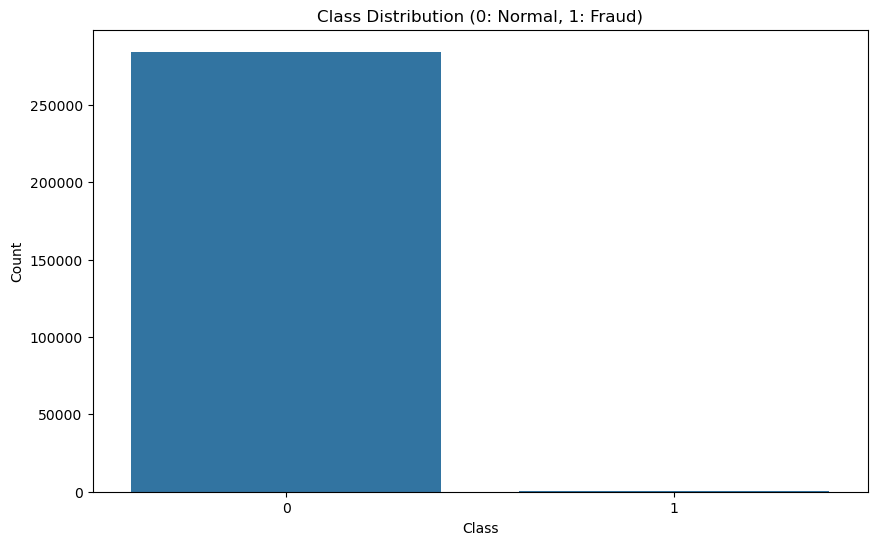

In [9]:
# Checking how many are fraud cases and real transaction in dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

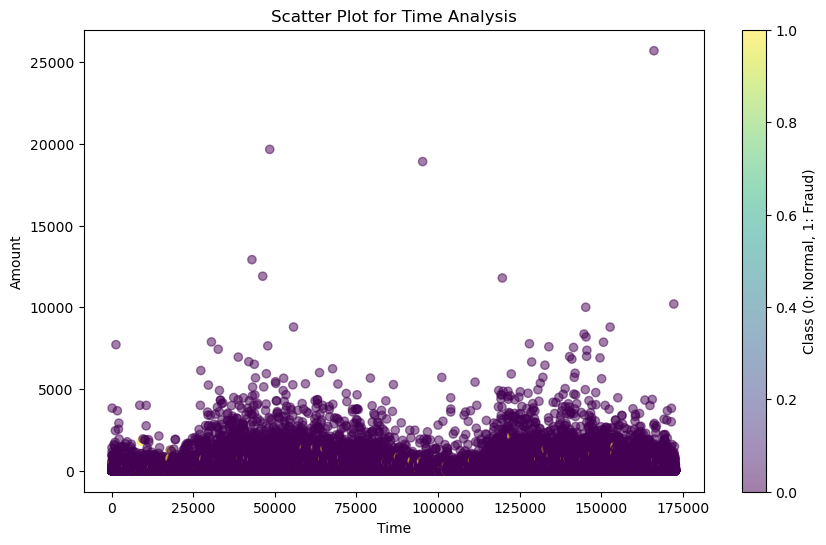

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Time'],df['Amount'],c=df['Class'],alpha=0.5)
plt.title("Scatter Plot for Time Analysis")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.colorbar(label='Class (0: Normal, 1: Fraud)')
plt.show()


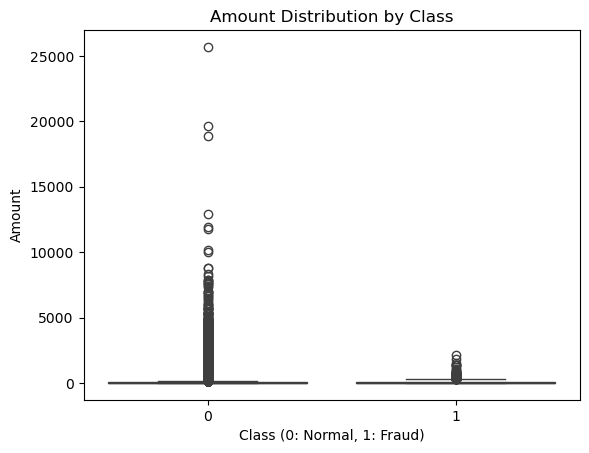

In [21]:
sns.boxplot(x=df['Class'], y=df['Amount'])
plt.title('Amount Distribution by Class')
plt.xlabel('Class (0: Normal, 1: Fraud)')
plt.ylabel('Amount')
plt.show()

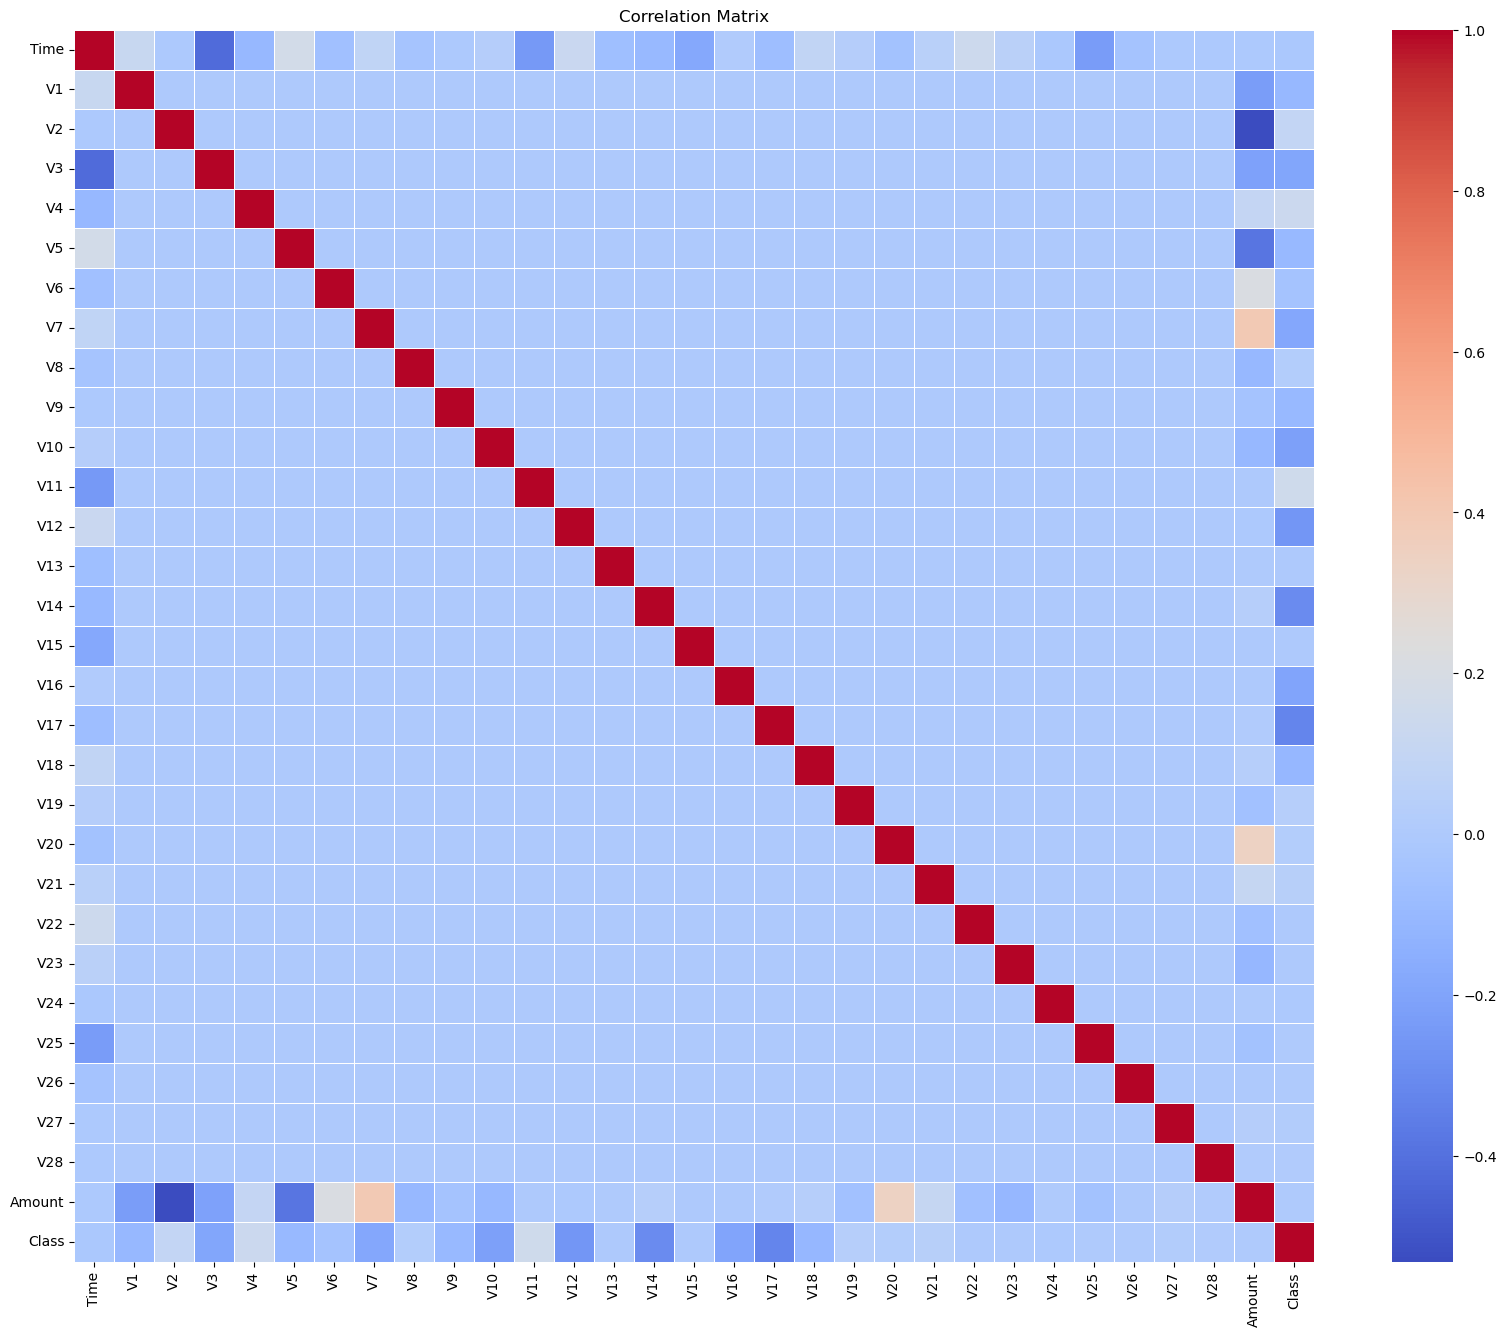

In [22]:
plt.figure(figsize=(20, 16))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Pre-Processing

In [ ]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set shape: (227845, 30)
Testing set shape: (56962, 30)


In [ ]:
# Handle Class Imbalance using SMOTE
# We are using SMOTE that is synthetic minority over sampling technique
# We are doing this as we have very less fraud cases in dataset which can be a problem when training ML Model.
# Using SMOTE we increase some of the similar fraud cases.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print(f"Original training set shape: {X_train_scaled.shape}")
print(f"Resampled training set shape: {X_train_resampled.shape}")
print(f"Class distribution after SMOTE: {pd.Series(y_train_resampled).value_counts()}")


Original training set shape: (227845, 30)
Resampled training set shape: (454902, 30)
Class distribution after SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


# Building the Artificial Neural Network (ANN)

In [ ]:
'''
Key Features of the Model
Fully Connected Layers (Dense Layers)

Uses 64, 32, and 16 neurons in the hidden layers.
Each layer applies the ReLU activation function to introduce non-linearity.
Batch Normalization

Normalizes activations between layers to speed up training and stabilize learning.
Dropout Layers (30%)

Prevents overfitting by randomly deactivating some neurons during training.
Adam Optimizer

adam is an adaptive optimizer that adjusts learning rates dynamically for better performance.
What Is This Model Used For?
Since this model uses binary classification its good for our fraud detection usecase.
'''
model = Sequential([
    # Input layer
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Hidden layers
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Output layer
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,057 (19.75 KB)

 Trainable params: 4,833 (18.88 KB)

 Non-trainable params: 224 (896.00 B)

In [27]:
# Training the ANN on our dataset
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Train the model
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=30,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9202 - loss: 0.1981 - val_accuracy: 0.9892 - val_loss: 0.0307
Epoch 2/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9862 - loss: 0.0399 - val_accuracy: 0.9979 - val_loss: 0.0100
Epoch 3/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 4/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9942 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 5/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9953 - loss: 0.0158 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 6/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9960 - loss: 0.0140 - val_accuracy: 0.9999 - val_loss: 0.0014
Epoch 7/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9964 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/30
1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9968 - loss: 0.0116 - 

# Model Evaluation

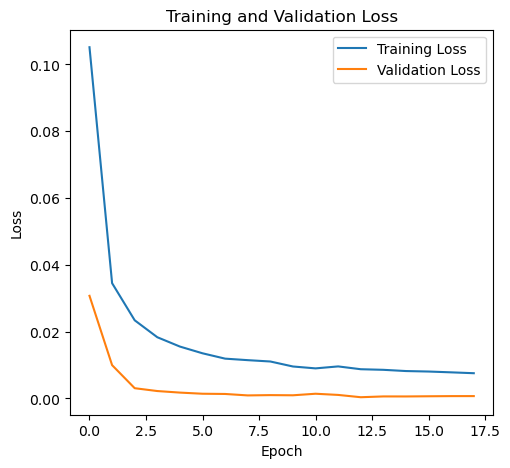

In [29]:
# Evaluating the Model Performance 
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


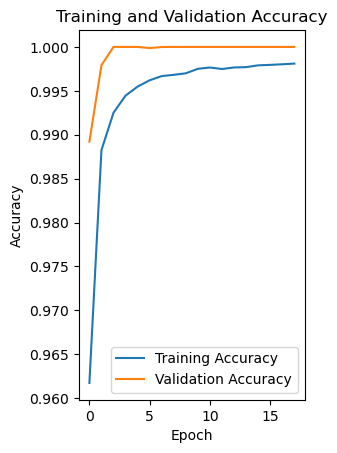

In [30]:

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Get predictions
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9986 - loss: 0.0077
Test Loss: 0.0079
Test Accuracy: 0.9985
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.55      0.86      0.67        98

    accuracy                           1.00     56962
   macro avg       0.77      0.93      0.83     56962
weighted avg       1.00      1.00      1.00     56962



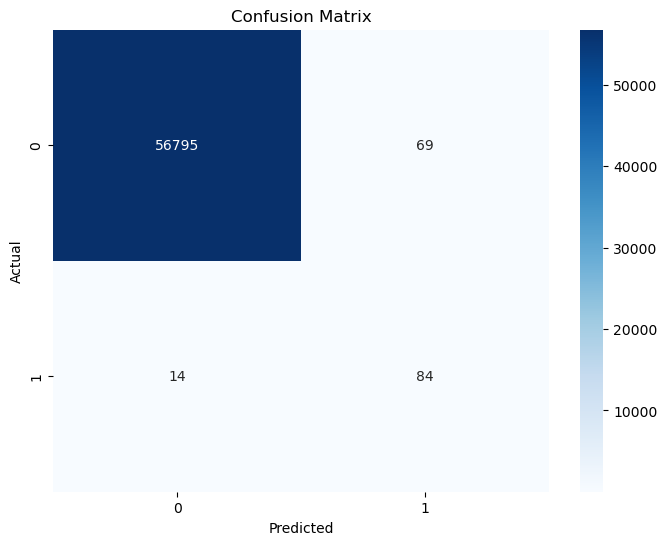

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

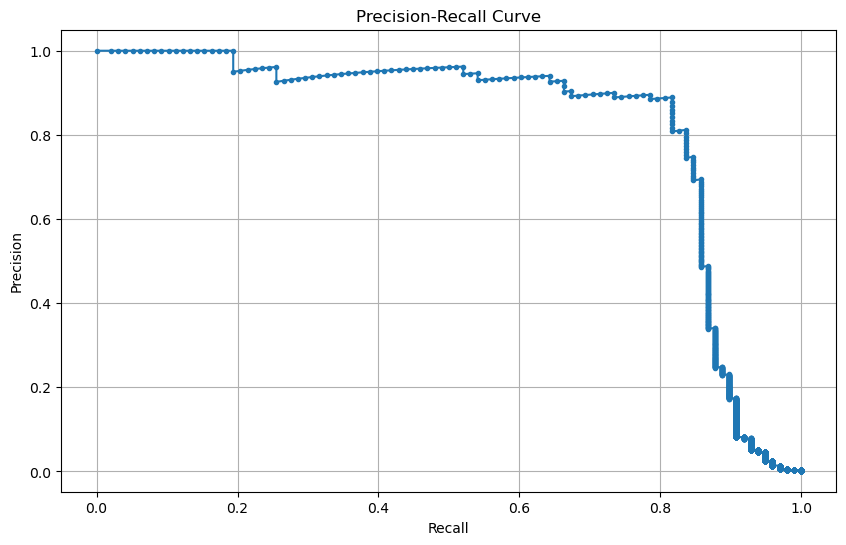

In [35]:
# Calculate Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

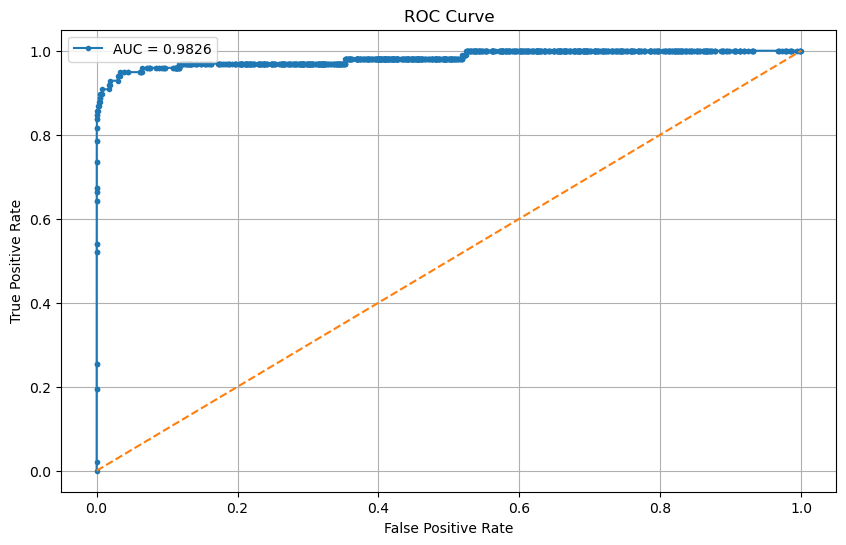

In [36]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Threshold Optimization

In [41]:
# Find the optimal threshold for classification
thresholds = np.arange(0, 1, 0.01)
f1_scores = []

from sklearn.metrics import f1_score

for threshold in thresholds:
    y_pred_threshold = (y_pred_prob > threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    f1_scores.append(f1)

# Find the threshold that maximizes F1 score
optimal_threshold = thresholds[np.argmax(f1_scores)]
optimal_f1 = max(f1_scores)

print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"Optimal F1 Score: {optimal_f1:.4f}")


Optimal Threshold: 0.9900
Optimal F1 Score: 0.7685


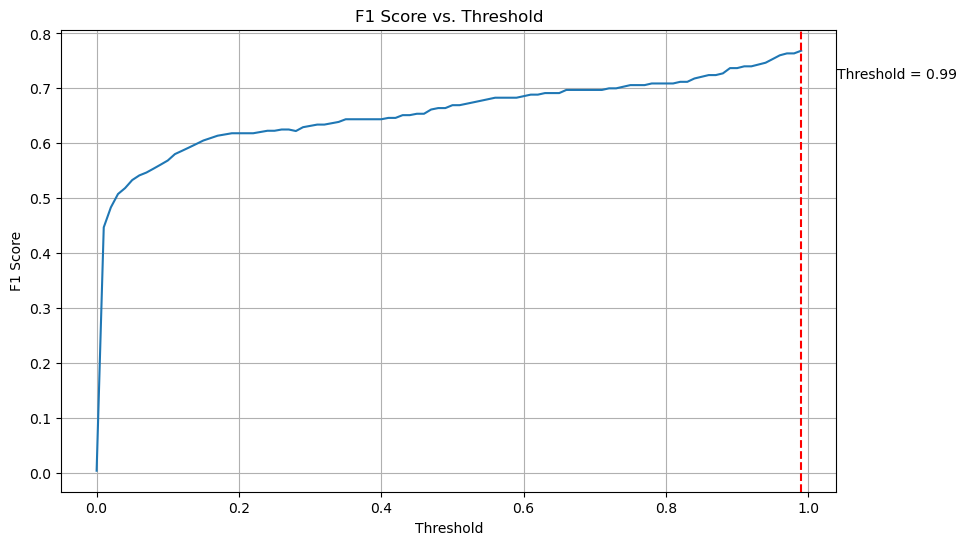

In [42]:
# Plot F1 score vs. threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.text(optimal_threshold+0.05, optimal_f1-0.05, f'Threshold = {optimal_threshold:.2f}')
plt.title('F1 Score vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()


In [43]:
# Apply Optimal Threshold
y_pred_optimal = (y_pred_prob > optimal_threshold).astype(int)

print("\nPerformance with Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))



Performance with Optimal Threshold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.85      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962



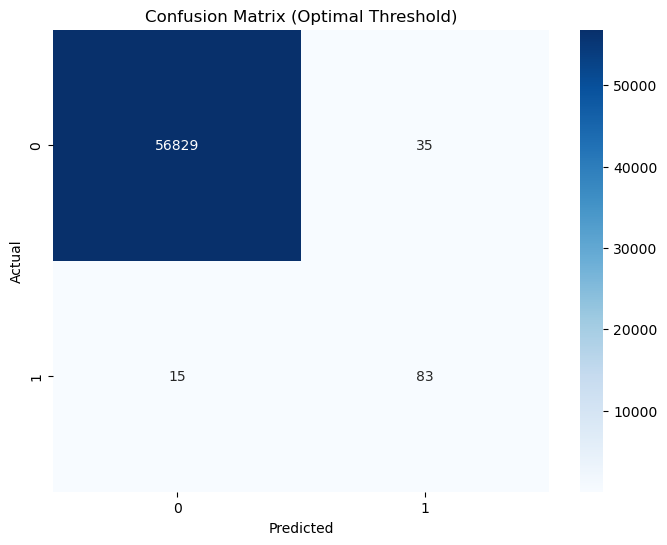

In [45]:
# Final confusion matrix with optimal threshold
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Optimal Threshold)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Save the Model

In [46]:
# Save the model
model.save('credit_card_fraud_detection_model.h5')
print("\nModel saved as 'credit_card_fraud_detection_model.h5'")


Model saved as 'credit_card_fraud_detection_model.h5'
